# Fundamentals of Statistical Finance

## Idea

When we speak about some mathematics in Finance, we know that it has something to do with data. That is correct. Although a lot of people are very interested in quatitative finace, they seem to know a little about it. There are few miscenceptions as well. First, they think it's just some basic number crunching but it's not true. Second, they think it's a lot of deep mathematics but unfortunately, that is not a proper idea as well. Third, they think it's related to machine learning but trust me, ML is just 0.01% of quantitative finance. 

I am starting to write this series of notebooks with pyhton codes and some dummy data to show example of most diffcult concepts of quantitative finance aiming to help best finance professionals. That is why my series is named as "When Finance meets Statistics". 

## What are the problems? 

I have hired and trained more than 30 data analysts and scientists in my short career span of 6 years. In my opnion, the biggest problem in any analysts job is interpretation of data and analysis. The interpretation is the first stage of communicaton. If you are not being able to interpret data and analysis well, you won't be able to communicate it better. As a result, all of your tools, ML magic, analysis and skills will seem pretty useless. So, this is the problem definition I am trying to solve for here. I will largely focus on right interpretation of data and statistical analysis.  



## How do we do it? 

First, I will go through some very fundamental ideas of statistics and how they can be used in finance. Second, I will take an example dataset to apply those ideas. Third, we will interpret data in very detailed format - actually this is the oart where I will put 80% efforts so that when you use any tool, you know what the results are telling is. We need to understand the story behind these financial data and only then we can make informed decisions. 

For every chapter, I will take a dataset and use Python as a coding language. Although I don't use Python for statistics a lot, I hope I can do it for financial statitics but if you find any issues with my codes, please contact me at amon163c@gmail.com - that would help me to improve as well. 

## Contents 

Chapter 1: Fundamentals of Statistical Finance

Chapter 2: Martingales, Random Walks and Time Series models for Statistical Finance 

Chapter 3: Capital Asset Pricing Models and Hedge Models

Chapter 4: Brownian Motion, Black Scholes Model and Some Advanced applications

Chapter 5: Machine Learning Applications (Case studies) 

## Chapter 1:  Fundamentals of Statistical Finance

In the first secion, we will use the bitcoin's daily price data of 4 years from 2019 to 2022. We can use 2 types of daily returns (1) discrete returns (2) continuous returns. I have used dicrete returns for my analysis but I am sure you will find similar results for continuous returns also. 

First, I will analyze the distribution of daily returns and try to interpret what it means - in this part, we try to build story for each and every detail of the data. 

So, I am loading all necessary packages first and then let's have look at the data first. 



In [39]:
#import all necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy import stats as ss
from scipy.stats import shapiro,t
from sklearn.model_selection import train_test_split
import numpy as np

sns.set_style('whitegrid')
np.random.seed(1)

In [4]:
#read the csv and save if needed
BCX = pd.read_csv("BCX1822V.csv")
BCX

,Date,price,open,high,low,change_pct
0,12/31/2022,16537.4,16607.2,16635.9,16487.3,-0.0042
1,12/30/2022,16607.2,16636.4,16644.4,16360.0,-0.0018
2,12/29/2022,16636.4,16546.2,16659.1,16496.6,0.0055
3,12/28/2022,16546.2,16705.9,16781.1,16474.2,-0.0096
4,12/27/2022,16706.1,16918.2,16964.0,16610.1,-0.0125
...,...,...,...,...,...,...
1456,1/5/2019,3785.4,3802.8,3846.7,3769.0,-0.0046
1457,1/4/2019,3802.7,3780.5,3823.9,3720.0,0.0060
1458,1/3/2019,3780.1,3874.1,3875.8,3753.0,-0.0242
1459,1/2/2019,3873.8,3809.7,3894.8,3768.1,0.0169


The first step of our analysis would be doing descriptive analysis of daily returns. This will include: 

1. Mean
2. Median
3. Percentiles
4. Variance and volatility of returns
5. Skewness and Kurtosis
6. Low and high expected shortfalls 

In [5]:
#function for all key summary statistics
def summary_statistics(df):
    five_pctl = df.quantile(0.05)
    nintyfive_pctl = df.quantile(0.95)
    esfL = (df[df <= five_pctl]).mean()
    esfH = (df[df >= nintyfive_pctl]).mean()
    print("Summary statistics:")
    print(df.describe())
    print(ss.describe(df))
    print("Expected Shortfall for lower Q:",round(esfL,3))
    print("Expected Shortfall for Higher Q:",round(esfH,3))
    volatility = (df.std())*np.sqrt(252)
    print("volatility:", round(volatility,3))
    
#we run this fnction over our dataset for daily returns of bitcoins
summary_statistics(BCX["change_pct"])  

Summary statistics:
count    1461.000000
mean        0.001763
std         0.038003
min        -0.391800
25%        -0.014900
50%         0.000700
75%         0.018500
max         0.194100
Name: change_pct, dtype: float64
DescribeResult(nobs=1461, minmax=(-0.3918, 0.1941), mean=0.0017625598904859687, variance=0.0014442624671411023, skewness=-0.5176255603243027, kurtosis=10.243963228110324)
Expected Shortfall for lower Q: -0.086
Expected Shortfall for Higher Q: 0.094
volatility: 0.603


### Interpretations 

1. Average daily return is 0.17% and median daily return is 0.07% with daily standart deviation of 3.8% whiic already indicates a low daily return and high volatility. 
2. The skewness (=-0.517) of returns is left-skewed and the curve is LeptoKurtic because Kurtosis is 10.24 which is greater than Kurtosis of a Normal distribution. A leptokurtic distribution indicates that the data have more outliers or extreme values than a normal distribution. So, this data is highly peaked and has heavier tails. This is very common in financial data. 
3. Expected shortfall is defined as mean value of extreme gains or losses beyond a certain level. We have used 5% as the threshold for both sides. So, there is a 5% probability that your daily losses will be more than 8.6% and also there is a 5% probability that your daily gains will be more than 9.4%. So this stock is almost equally likely for extreme gains or losses. 
4. The yearly volatility of the stock is 0.603 or 60.3% - this is insanely big for stock market and just looking at this data we can say this is a very very risky stock to add in your portfolio. 


Theoretically, we model daily returns as normally distributed data. In books they use: Return ~ N(Mu, Sigma) to indicate this. But, when you are an analyst if you believe such stupid thing, it will be a mistake. So, we need to check this. We already have seen that return distribution is slightly left-skewed and Leptokurtic which indicates it might fit well actually but we will dig it deeper and check. 

First, we first plot a histogram of daily returns. Then, we plot Kernel density of returns along with a normal distribution. To plot the sample normal distrbution, we use metrics from emphirical data which means: number of samples = 1461, mean = 0.0017, sigma = 0.001444. The comparison between these two will be interesting. 

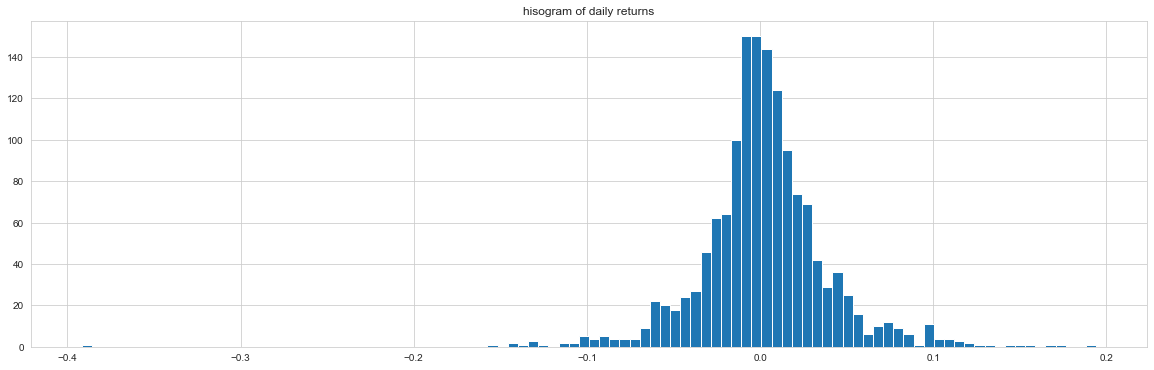

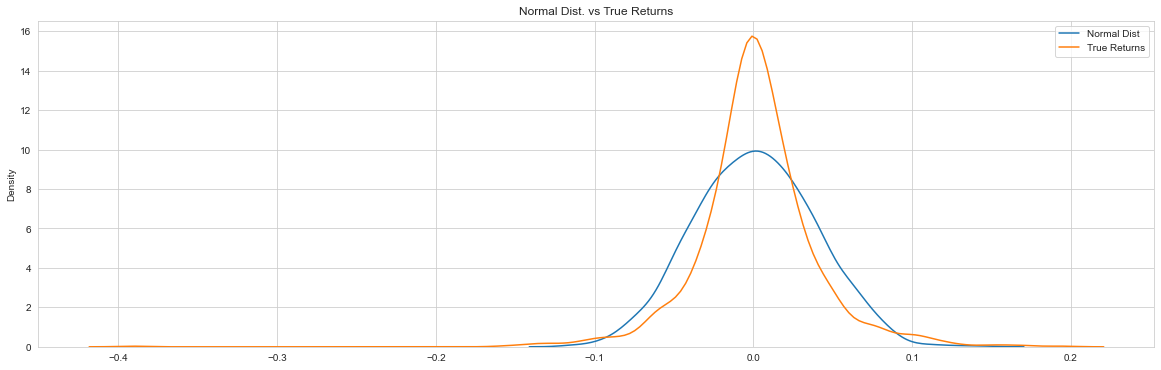

In [7]:
#visual inspection of normality of returns
def visual_inspection_of_normality(df):
    plt.rcParams["figure.figsize"] = (20,6)
    plt.hist(BCX["change_pct"], bins = 100)
    plt.title("hisogram of daily returns")
    mu = df.mean()
    var = df.std()
    nd = np.random.normal(loc=mu, scale= var, size=1471)
    plt.show()
    sns.kdeplot(np.array(nd), label = "Normal Dist").set(title = "Normal Dist. vs True Returns")
    sns.kdeplot(np.array(df), label = "True Returns")
    plt.rcParams["figure.figsize"] = (20,6)
    plt.legend()
    
#we run this function for our dataset for daily returns of bitcoins
visual_inspection_of_normality(BCX['change_pct'])   

The first figure shows that daily returns indeed has a bell-shape which indicates some kind of unknown randomness. The second figure however potrays what we have already interpreted from the descriptive statistics. But still it is not convincing to belive that daily returns are not normally distributed. 

That being said, we will apply two statistical theory to know more about this. 

1. QQ plot - this plots emphical data comparing a nomral distribution also but in a better way. 
2. Shapiro Test - this is a very strong test to check normality of data. 

test-1: QQ plot


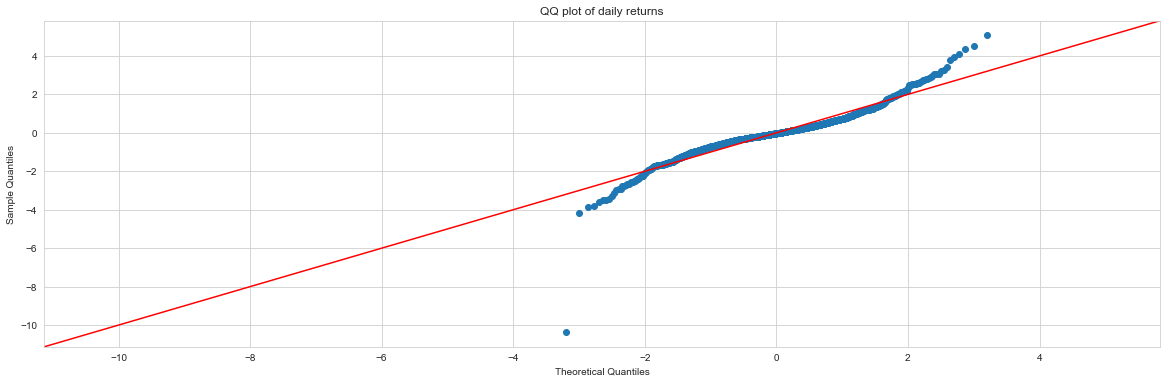

Test-2: Shapiro Test
Shapiro-Wilk test statistic:  0.9163883328437805
p-value:  1.1488818267766204e-27
Sample does not look Gaussian (reject H0)


In [218]:
#is the daily returns are truly random? 
def check_normality_of_returns(df): 
    print("test-1: QQ plot")
    sm.qqplot(df, line = '45', fit = True)
    plt.title("QQ plot of daily returns")
    plt.show()
    print("Test-2: Shapiro Test")
    stat, p = shapiro(df)
    print('Shapiro-Wilk test statistic: ', stat)
    print('p-value: ', p)
    alpha = 0.05
    if p > alpha:
        print('Sample looks Gaussian (fail to reject H0)')
    else:
        print('Sample does not look Gaussian (reject H0)')

#we run this fnction over our dataset for daily returns of bitcoins
check_normality_of_returns(BCX['change_pct'])    

Both QQ plot and Shapiro test provides enough evidence to say that daily return is not normally distributed. From QQ plot we can see that, ~70% of data follows a normal distribution but then it starts to deviate. Moreover, Shapiro test strongly rejects normality. 



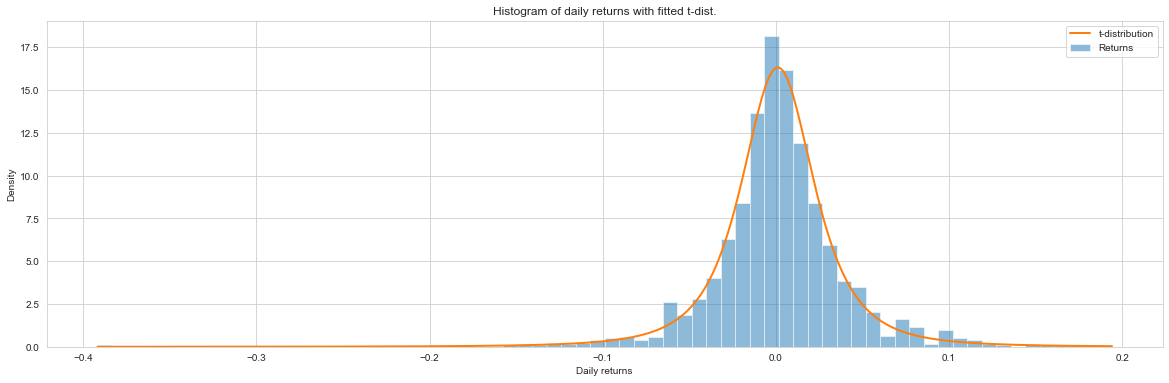

The data does not come from a t-distribution.
Test statistic: 0.9163883328437805
p-value: 1.1488818267766204e-27


In [50]:
def checking_t_fit(df):
    df1, loc, scale = t.fit(df)
    plt.hist(returns, bins=70, density=True, alpha=0.5)
    x = np.linspace(returns.min(), returns.max(), 1000)
    pdf = t.pdf(x, df1, loc, scale)
    plt.plot(x, pdf, linewidth=2)
    plt.xlabel('Daily returns')
    plt.ylabel('Density')
    plt.title('Histogram of daily returns with fitted t-dist.')
    plt.legend(['t-distribution', 'Returns'])
    plt.show()
    stat, p_value = shapiro(df)
    crit_val = t.ppf(0.975, df)
    if p_value < 0.05:
        print('The data does not come from a t-distribution.')
    else:
        print('The data comes from a t-distribution.')
    print('Test statistic:', stat)
    print('p-value:', p_value)

#we run this fnction over our dataset for daily returns of bitcoins
checking_t_fit(BCX["change_pct"])

In [48]:
def gaussianVSt(df):
    train_data, test_data = train_test_split(df, test_size=0.15, random_state=42)
    mu, std = norm.fit(train_data)
    df, loc, scale = t.fit(train_data)
    # Calculate AIC and BIC for both models on the test data
    gaussian_aic = -2*np.log(norm.pdf(test_data, mu, std)).sum() + 2*3
    gaussian_bic = -2*np.log(norm.pdf(test_data, mu, std)).sum() + np.log(len(test_data))*3
    t_aic = -2*np.log(t.pdf(test_data, df, loc, scale)).sum() + 2*4
    t_bic = -2*np.log(t.pdf(test_data, df, loc, scale)).sum() + np.log(len(test_data))*4
    print(f'Gaussian AIC: {gaussian_aic}, Gaussian BIC: {gaussian_bic}')
    print(f't-distribution AIC: {t_aic}, t-distribution BIC: {t_bic}')
    if gaussian_aic < t_aic and gaussian_bic < t_bic:
        print('Conclusion: The Gaussian distribution fits better.')
    else:
        print('Conclusion: The t-distribution fits better.')

#we run this fnction over our dataset for daily returns of bitcoins
gaussianVSt(BCX["change_pct"])

Gaussian AIC: -633.1011633239889, Gaussian BIC: -622.9202806849318
t-distribution AIC: -792.5817451647672, t-distribution BIC: -779.0072349793578
Conclusion: The t-distribution fits better.


In summary, if the data is generated from a t-distribution, it is still a random variable like the Gaussian distribution, but with slightly different properties due to the shape of the distribution.

But, I think we are left with some interesting questions: 

1. If this is not normally distributed, what kind of distribution is it following? Can we ever understand its true nature? 
2. Are daily returns random? If they are random, it means we can't really predict stock prices. 
3. If it is not random, what factors are actually influencing it? Can we ever solve this puzzle using data? 

Yes - these are valid questions and we will go through them one by one in future. 

Thanks for reading this document.